In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [123]:
 X, y = make_blobs(n_samples=100, centers=2, n_features=2,
...                   random_state=0)

In [127]:
y[y==0] = -1

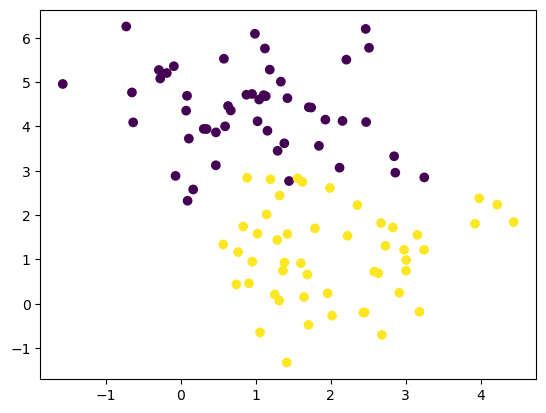

In [128]:
plt.scatter(X[:,0],X[:,1],c=y)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [130]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [142]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [143]:
model.score(X_test,y_test)

0.9393939393939394

# Custom Support Vector Machines

In [173]:
class SVM:
    def __init__(self, learning_rate=0.01, c=0.01, n_iters=1000):
        self.lr = learning_rate
        self.c = c
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
    
        self._X = X
        self._y= y
        # init weights
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            dw, db = 0, 0
            for X_i, y_i in zip(self._X, self._y):
                ti = y_i * (np.dot(self.w.T, X_i) + self.b)
                if ti <= 1:
                    dw += self.c * y_i * X_i
                    db += self.c * y_i
            self.w -= self.lr * self.w + self.lr * dw
            self.b += self.lr * db



    def predict_point(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
    
    def predict(self, X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results)
    
    def score(self, X_test, y_test):
        ans = self.predict(X_test)
        return (y_test == ans).mean()


In [174]:
model = SVM()
model.fit(X_train,y_train)

In [175]:
model.score(X_test,y_test)

0.6060606060606061